# Main goal

The objective of the exercice is to understand the efficiency of an industrial plant and to be able to perform an accurate but trustable prediction of this efficiency.
1)The target variable to predict  is *GrossEfficiency*

# Delivrable

Request:
- Show how you got a first overview of the dataset
- Predict *GrossEfficiency* with 
 *'AirHumidity', 'AirPressure', 'AirTemperature',
       'GasCHRatio', 'GasCO2Concentration', 'GasEthaneConcentration',
       'GasHexaneConcentration', 'GasHhvEnergy', 'GasIbutaneConcentration',
       'GasIpentaneConcentration', 'GasLhvEnergy', 'GasMethaneConcentration',
       'GasN2Concentration', 'GasNbutaneConcentration',
       'GasNeopentaneConcentration', 'GasNpentaneConcentration',
       'GasPropaneConcentration', 'GasRelativeDensity', 'GasWobbeInf',
       'GasWobbeSup', 'GrossPower'*
 - Provide one or more metrics assessing the quality of the fit
 - Describe -as text / comment- how you would improve the previous parts if you would have more time (Optional)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('max_columns', 100)

In [2]:
df= pd.read_csv('dfValid_Xexog_y.csv')
df.head(10)

,#LineFullDataSet,Timestamp,AirHumidity,AirPressure,AirTemperature,GasCHRatio,GasCO2Concentration,GasEthaneConcentration,GasHexaneConcentration,GasHhvEnergy,GasIbutaneConcentration,GasIpentaneConcentration,GasLhvEnergy,GasMethaneConcentration,GasN2Concentration,GasNbutaneConcentration,GasNeopentaneConcentration,GasNpentaneConcentration,GasPropaneConcentration,GasRelativeDensity,GasWobbeInf,GasWobbeSup,GrossPower,GrossEfficiency
0,1199,2015-03-22 23:00:00,75.381580,1012.281667,24.882820,3.159809,1.231261,4.645220,0.105123,41.276754,0.338723,0.108599,37.415562,86.756768,4.381941,0.434519,0.0,0.094981,1.965464,0.644118,46.468250,51.401799,642.936012,55.870035
1,1200,2015-03-23 00:00:00,70.840570,1011.627800,25.362420,3.160114,1.230425,4.640570,0.105533,41.275488,0.340175,0.109898,37.454562,86.688370,4.397743,0.436528,0.0,0.095875,1.964265,0.644451,46.454585,51.381693,648.545777,56.527582
2,1201,2015-03-23 01:00:00,67.683015,1011.111889,25.848530,3.160419,1.242197,4.627870,0.104465,41.274222,0.343888,0.111197,37.296274,86.663580,4.399205,0.439288,0.0,0.096450,1.979045,0.645019,46.445205,51.371858,629.601801,56.923884
3,1202,2015-03-23 02:00:00,63.917820,1010.511385,25.776187,3.160723,1.247295,4.618640,0.106071,41.272956,0.346094,0.112496,37.287564,86.650192,4.435064,0.444298,0.0,0.098997,1.969762,0.645287,46.430018,51.355793,629.878983,56.877601
4,1203,2015-03-23 03:00:00,55.975115,1010.119500,25.868055,3.161028,1.238268,4.604286,0.110483,41.201310,0.347224,0.113795,37.278854,86.648904,4.499998,0.448395,0.0,0.100627,1.953770,0.645133,46.419204,51.335278,646.498867,57.086776
5,1204,2015-03-23 04:00:00,57.767290,1010.157000,26.052524,3.160576,1.228012,4.589931,0.111894,41.205127,0.345152,0.113922,37.272413,86.689467,4.485496,0.446516,0.0,0.100861,1.943481,0.644815,46.411545,51.339709,620.907617,57.122591
6,1205,2015-03-23 05:00:00,56.608070,1010.460000,24.882820,3.159996,1.217756,4.578464,0.111919,41.208945,0.343786,0.112800,37.286801,86.666979,4.470993,0.437817,0.0,0.100299,1.947558,0.645016,46.413762,51.350713,643.721550,57.224748
7,1206,2015-03-23 06:00:00,54.593460,1011.479800,25.140622,3.160194,1.207500,4.583429,0.112590,41.212762,0.342215,0.112056,37.255850,86.702603,4.466818,0.441665,0.0,0.099135,1.940718,0.644679,46.420673,51.350159,524.551808,55.969234
8,1207,2015-03-23 07:00:00,58.955440,1011.889500,25.138026,3.160423,1.181979,4.598464,0.111716,41.244633,0.343112,0.111726,37.285220,86.680913,4.480629,0.437142,0.0,0.098978,1.945919,0.644663,46.428049,51.355781,511.149940,55.350307
9,1208,2015-03-23 08:00:00,64.628540,1013.011333,26.558160,3.160988,1.175644,4.614965,0.108616,41.263870,0.344541,0.111086,37.302445,86.646898,4.489106,0.445691,0.0,0.099375,1.961666,0.645007,46.435426,51.360382,597.989620,57.081290


In [3]:
df.columns

Index(['#LineFullDataSet', 'Timestamp', 'AirHumidity', 'AirPressure',
       'AirTemperature', 'GasCHRatio', 'GasCO2Concentration',
       'GasEthaneConcentration', 'GasHexaneConcentration', 'GasHhvEnergy',
       'GasIbutaneConcentration', 'GasIpentaneConcentration', 'GasLhvEnergy',
       'GasMethaneConcentration', 'GasN2Concentration',
       'GasNbutaneConcentration', 'GasNeopentaneConcentration',
       'GasNpentaneConcentration', 'GasPropaneConcentration',
       'GasRelativeDensity', 'GasWobbeInf', 'GasWobbeSup', 'GrossPower',
       'GrossEfficiency'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4517 entries, 0 to 4516
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   #LineFullDataSet            4517 non-null   int64  
 1   Timestamp                   4517 non-null   object 
 2   AirHumidity                 4517 non-null   float64
 3   AirPressure                 4517 non-null   float64
 4   AirTemperature              4517 non-null   float64
 5   GasCHRatio                  4517 non-null   float64
 6   GasCO2Concentration         4517 non-null   float64
 7   GasEthaneConcentration      4517 non-null   float64
 8   GasHexaneConcentration      4517 non-null   float64
 9   GasHhvEnergy                4517 non-null   float64
 10  GasIbutaneConcentration     4517 non-null   float64
 11  GasIpentaneConcentration    4517 non-null   float64
 12  GasLhvEnergy                4517 non-null   float64
 13  GasMethaneConcentration     4517 

All datas are in float type OK

# Check data cleaning

In [5]:
df.isna().sum()

#LineFullDataSet              0
Timestamp                     0
AirHumidity                   0
AirPressure                   0
AirTemperature                0
GasCHRatio                    0
GasCO2Concentration           0
GasEthaneConcentration        0
GasHexaneConcentration        0
GasHhvEnergy                  0
GasIbutaneConcentration       0
GasIpentaneConcentration      0
GasLhvEnergy                  0
GasMethaneConcentration       0
GasN2Concentration            0
GasNbutaneConcentration       0
GasNeopentaneConcentration    0
GasNpentaneConcentration      0
GasPropaneConcentration       0
GasRelativeDensity            0
GasWobbeInf                   0
GasWobbeSup                   0
GrossPower                    0
GrossEfficiency               0
dtype: int64

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
#LineFullDataSet,4517.0,4142.332964,1899.907020,1199.000000,2666.000000,3928.000000,5395.000000,8015.000000
AirHumidity,4517.0,61.894498,19.852776,4.687500,51.354525,68.476317,76.073701,93.120660
AirPressure,4517.0,1002.754830,5.791007,989.182133,998.426133,1002.134667,1007.216000,1017.654000
AirTemperature,4517.0,32.601605,3.582818,21.731770,30.517580,32.685545,34.573565,47.258349
GasCHRatio,4517.0,3.163787,0.017673,3.134873,3.157842,3.161879,3.165400,3.313306
GasCO2Concentration,4517.0,1.099667,0.164100,0.616877,1.096030,1.148224,1.184087,1.643321
GasEthaneConcentration,4517.0,4.651949,0.597277,3.888975,4.485713,4.580064,4.656961,9.079770
GasHexaneConcentration,4517.0,0.130753,0.029631,0.084663,0.119617,0.126965,0.134547,0.380298
GasHhvEnergy,4517.0,41.365181,0.600803,40.796460,41.198496,41.275488,41.346792,46.325830
GasIbutaneConcentration,4517.0,0.346203,0.021723,0.268845,0.334337,0.344802,0.354965,0.505301


## Histogramme de la colonne 'GrossEfficiency'

<AxesSubplot:xlabel='GrossEfficiency', ylabel='Count'>

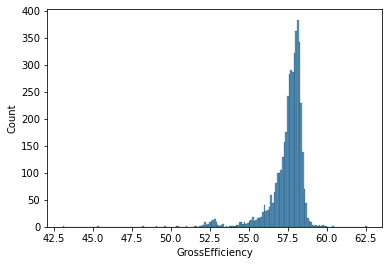

In [7]:
#REgarder l'histogramme de 'GrossEfficiency'
sns.histplot(x='GrossEfficiency', data=df)

In [ ]:
#Aspect global de la distribution pas vraiment une gaussienne abrupte avec un épaulement 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GrossEfficiency', ylabel='Density'>

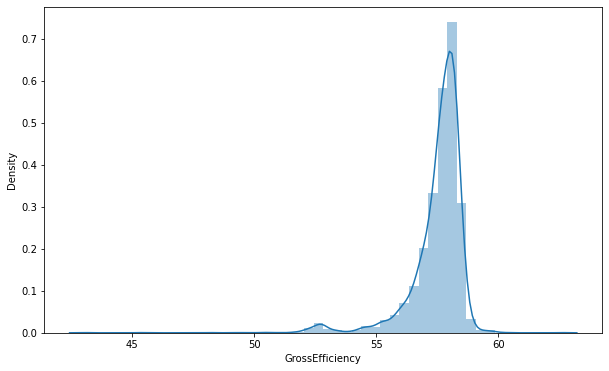

In [8]:
plt.figure(figsize=(10,6))
sns.distplot(df['GrossEfficiency'])

# Hypothesis testing

In [17]:
from scipy.stats import ttest_rel
from scipy.stats import ttest_1samp

In [14]:
moy=df.GrossEfficiency.mean()

In [15]:
std_effi=df.GrossEfficiency.std()

In [18]:
eni_prod = np.random.normal(moy, std_effi, 100)
ttest_1samp(eni_prod, moy)

Ttest_1sampResult(statistic=-1.1664305599150593, pvalue=0.24624259421642075)

# Important features correlation

<AxesSubplot:>

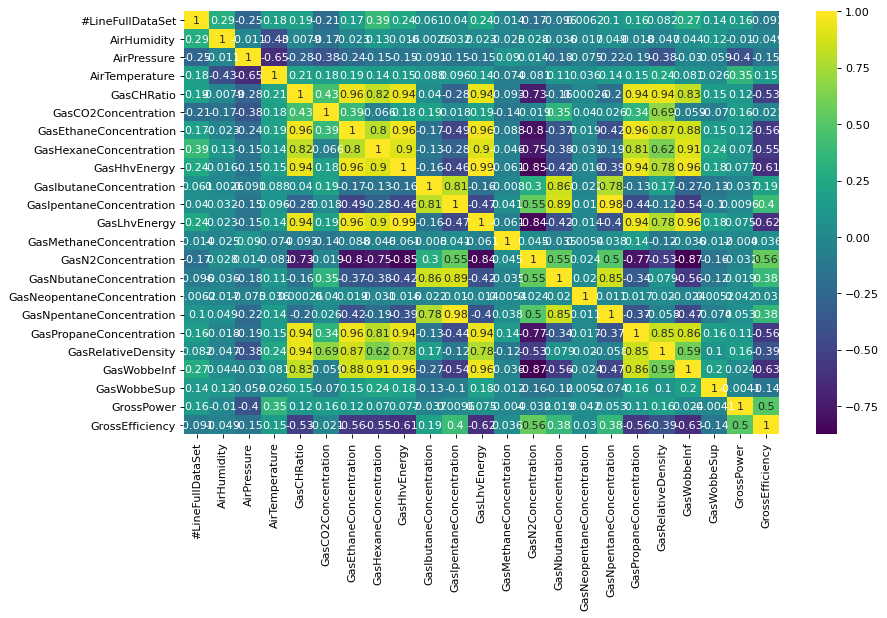

In [19]:
from matplotlib.pyplot import figure
figure(figsize=(12, 7), dpi=80)
sns.heatmap(df.corr(), annot=True,cmap="viridis")

0) Each square shows the correlation between the variables on each axis. Correlation ranges from -1 to +1. Values closer to zero means there is no linear trend between the two variables. 

1) The close to 1 the correlation is the more positively correlated they are; that is as one increases so does the other and the closer to 1 the stronger this relationship is.

2) A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases. The diagonals are all 1/dark green because those squares are correlating each variable to itself (so it's a perfect correlation). For the rest the larger the number and darker the color the higher the correlation between the two variables. The plot is also symmetrical about the diagonal since the same two variables are being paired together in those squares.

In [20]:
#Sort the most important features for 'GrossEfficiency'
df.corr()['GrossEfficiency'].sort_values()

GasWobbeInf                  -0.626181
GasLhvEnergy                 -0.619891
GasHhvEnergy                 -0.613322
GasPropaneConcentration      -0.563837
GasEthaneConcentration       -0.563508
GasHexaneConcentration       -0.554598
GasCHRatio                   -0.529720
GasRelativeDensity           -0.394834
AirPressure                  -0.146379
GasWobbeSup                  -0.138598
#LineFullDataSet             -0.091341
AirHumidity                  -0.048985
GasCO2Concentration          -0.021174
GasNeopentaneConcentration    0.030372
GasMethaneConcentration       0.036016
AirTemperature                0.154684
GasIbutaneConcentration       0.189784
GasNpentaneConcentration      0.375831
GasNbutaneConcentration       0.377871
GasIpentaneConcentration      0.402162
GrossPower                    0.502617
GasN2Concentration            0.557943
GrossEfficiency               1.000000
Name: GrossEfficiency, dtype: float64

# Simple model for regression

In [21]:
from statsmodels.formula.api import ols

In [22]:
model = ols('GrossEfficiency ~ GasWobbeInf', data=df) # dependent ~ independent

In [23]:
model_fit = model.fit() #calculates everything

In [24]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        GrossEfficiency   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     2912.
Date:                Mon, 10 Jan 2022   Prob (F-statistic):               0.00
Time:                        09:40:16   Log-Likelihood:                -5836.3
No. Observations:                4517   AIC:                         1.168e+04
Df Residuals:                    4515   BIC:                         1.169e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     119.6484      1.152    103.887      0.000     117.390     121.906
GasWobbeInf    -1.3348      0.025    -53.965      0.000      -1.383      -1.286
==============================================================================
Omnibus:                     3477.681   Durbin-Watson:                   0.726
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           194232.797
Skew:                          -3.177   Prob(JB):                         0.00
Kurtosis:                      34.490   Cond. No.                     4.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
#-)R_squared is very low (the linear model not that efficient)
#-)Try more dependant variable

In [25]:
from statsmodels.api import OLS

In [26]:
#copy in a new df
df2 = df._get_numeric_data()

In [27]:
model = OLS(df2.GrossEfficiency, df2.drop('GrossEfficiency', axis=1)) #y,X

In [28]:
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        GrossEfficiency   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.797e+06
Date:                Mon, 10 Jan 2022   Prob (F-statistic):                        0.00
Time:                        09:40:31   Log-Likelihood:                         -4199.8
No. Observations:                4517   AIC:                                      8444.
Df Residuals:                    4495   BIC:                                      8585.
Df Model:                          22                                                  
Covariance Type:            nonrobust                                                  
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
#LineFullDataSet           -2.467e-05   6.18e-06     -3.994      0.000   -3.68e-05   -1.26e-05
AirHumidity                    0.0009      0.001      1.498      0.134      -0.000       0.002
AirPressure                    0.0059      0.003      2.198      0.028       0.001       0.011
AirTemperature                 0.0221      0.004      5.018      0.000       0.013       0.031
GasCHRatio                    28.2950      4.471      6.329      0.000      19.530      37.060
GasCO2Concentration           -0.2915      0.197     -1.483      0.138      -0.677       0.094
GasEthaneConcentration         0.1846      0.118      1.567      0.117      -0.046       0.416
GasHexaneConcentration        -5.2141      1.267     -4.115      0.000      -7.698      -2.730
GasHhvEnergy                  -0.1400      0.192     -0.729      0.466      -0.516       0.236
GasIbutaneConcentration       -0.5059      1.153     -0.439      0.661      -2.767       1.755
GasIpentaneConcentration      13.4837      6.655      2.026      0.043       0.436      26.531
GasLhvEnergy                  -1.7636      0.168    -10.508      0.000      -2.093      -1.435
GasMethaneConcentration        0.0147      0.004      3.755      0.000       0.007       0.022
GasN2Concentration             0.0785      0.033      2.374      0.018       0.014       0.143
GasNbutaneConcentration        0.7043      1.033      0.682      0.495      -1.321       2.729
GasNeopentaneConcentration    -0.7135     16.564     -0.043      0.966     -33.186      31.759
GasNpentaneConcentration      -5.2243      6.805     -0.768      0.443     -18.566       8.118
GasPropaneConcentration       -0.7655      0.177     -4.322      0.000      -1.113      -0.418
GasRelativeDensity            -4.8881     14.888     -0.328      0.743     -34.076      24.300
GasWobbeInf                    0.6192      0.158      3.927      0.000       0.310       0.928
GasWobbeSup                   -0.0015      0.003     -0.472      0.637      -0.008       0.005
GrossPower                     0.0096      0.000     60.245      0.000       0.009       0.010
==============================================================================
Omnibus:                     4957.013   Durbin-Watson:                   1.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1737375.440
Skew:                          -4.998   Prob(JB):                         0.00
Kurtosis:                      98.557   Cond. No.                     8.51e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that 

In [29]:
from statsmodels.api import add_constant

In [30]:
model2 = OLS(df2.GrossEfficiency, add_constant(df2.drop('GrossEfficiency', axis=1))) #y,X

In [31]:
model2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        GrossEfficiency   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     490.9
Date:                Mon, 10 Jan 2022   Prob (F-statistic):               0.00
Time:                        09:40:48   Log-Likelihood:                -4194.4
No. Observations:                4517   AIC:                             8435.
Df Residuals:                    4494   BIC:                             8582.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         47.9215     14.595      3.283      0.001      19.308      76.535
#LineFullDataSet           -2.643e-05   6.19e-06     -4.269      0.000   -3.86e-05   -1.43e-05
AirHumidity                    0.0007      0.001      1.132      0.258      -0.001       0.002
AirPressure                    0.0036      0.003      1.309      0.191      -0.002       0.009
AirTemperature                 0.0202      0.004      4.534      0.000       0.011       0.029
GasCHRatio                    12.9855      6.456      2.011      0.044       0.328      25.643
GasCO2Concentration           -0.3277      0.197     -1.666      0.096      -0.713       0.058
GasEthaneConcentration         0.2892      0.122      2.372      0.018       0.050       0.528
GasHexaneConcentration        -3.3960      1.382     -2.458      0.014      -6.104      -0.688
GasHhvEnergy                  -0.0665      0.193     -0.344      0.731      -0.445       0.312
GasIbutaneConcentration        0.7390      1.213      0.609      0.542      -1.639       3.117
GasIpentaneConcentration      13.5598      6.648      2.040      0.041       0.526      26.593
GasLhvEnergy                  -1.7207      0.168    -10.232      0.000      -2.050      -1.391
GasMethaneConcentration        0.0089      0.004      2.069      0.039       0.000       0.017
GasN2Concentration             0.0608      0.033      1.816      0.069      -0.005       0.126
GasNbutaneConcentration        1.1549      1.041      1.109      0.267      -0.886       3.196
GasNeopentaneConcentration    -5.5068     16.610     -0.332      0.740     -38.070      27.057
GasNpentaneConcentration      -6.2855      6.806     -0.924      0.356     -19.628       7.057
GasPropaneConcentration       -0.4623      0.200     -2.316      0.021      -0.854      -0.071
GasRelativeDensity             0.1959     14.952      0.013      0.990     -29.118      29.510
GasWobbeInf                    0.4847      0.163      2.978      0.003       0.166       0.804
GasWobbeSup                   -0.0015      0.003     -0.452      0.651      -0.008       0.005
GrossPower                     0.0095      0.000     60.169      0.000       0.009       0.010
==============================================================================
Omnibus:                     4977.476   Durbin-Watson:                   1.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1755874.913
Skew:                          -5.035   Prob(JB):                         0.00
Kurtosis:                      99.062   Cond. No.                     8.79e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.79

The condition number is large, Cond. No.	8.79e+06
. This might indicate that there are
strong multicollinearity 

In [32]:
model_fit = model2.fit()
y_pred = model_fit.predict()
resids = model_fit.resid
y_pred

array([57.08114072, 57.08292175, 57.18880313, ..., 52.61133295,
       52.82321103, 52.77263337])

<AxesSubplot:>

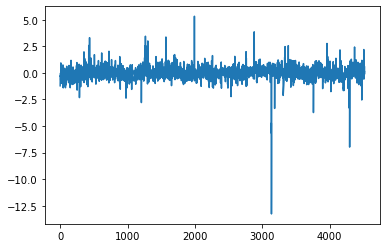

In [33]:
resids.plot()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Distribution of residuals')]

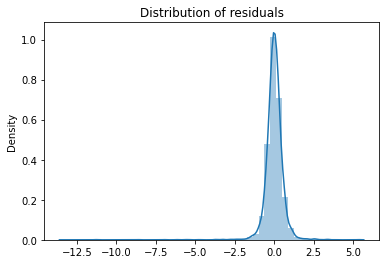

In [34]:
sns.distplot(resids).set(title='Distribution of residuals')

# Pre-processing: feature selection

In [144]:
from sklearn.feature_selection import SelectKBest, f_regression
from statsmodels.api import OLS,add_constant

In [142]:
X,y = df2.drop('GrossEfficiency', axis=1), df2.GrossEfficiency
OLS(y,add_constant(X)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        GrossEfficiency   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     490.9
Date:                Tue, 11 Jan 2022   Prob (F-statistic):               0.00
Time:                        10:37:03   Log-Likelihood:                -4194.4
No. Observations:                4517   AIC:                             8435.
Df Residuals:                    4494   BIC:                             8582.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         47.9215     14.595      3.283      0.001      19.308      76.535
#LineFullDataSet           -2.643e-05   6.19e-06     -4.269      0.000   -3.86e-05   -1.43e-05
AirHumidity                    0.0007      0.001      1.132      0.258      -0.001       0.002
AirPressure                    0.0036      0.003      1.309      0.191      -0.002       0.009
AirTemperature                 0.0202      0.004      4.534      0.000       0.011       0.029
GasCHRatio                    12.9855      6.456      2.011      0.044       0.328      25.643
GasCO2Concentration           -0.3277      0.197     -1.666      0.096      -0.713       0.058
GasEthaneConcentration         0.2892      0.122      2.372      0.018       0.050       0.528
GasHexaneConcentration        -3.3960      1.382     -2.458      0.014      -6.104      -0.688
GasHhvEnergy                  -0.0665      0.193     -0.344      0.731      -0.445       0.312
GasIbutaneConcentration        0.7390      1.213      0.609      0.542      -1.639       3.117
GasIpentaneConcentration      13.5598      6.648      2.040      0.041       0.526      26.593
GasLhvEnergy                  -1.7207      0.168    -10.232      0.000      -2.050      -1.391
GasMethaneConcentration        0.0089      0.004      2.069      0.039       0.000       0.017
GasN2Concentration             0.0608      0.033      1.816      0.069      -0.005       0.126
GasNbutaneConcentration        1.1549      1.041      1.109      0.267      -0.886       3.196
GasNeopentaneConcentration    -5.5068     16.610     -0.332      0.740     -38.070      27.057
GasNpentaneConcentration      -6.2855      6.806     -0.924      0.356     -19.628       7.057
GasPropaneConcentration       -0.4623      0.200     -2.316      0.021      -0.854      -0.071
GasRelativeDensity             0.1959     14.952      0.013      0.990     -29.118      29.510
GasWobbeInf                    0.4847      0.163      2.978      0.003       0.166       0.804
GasWobbeSup                   -0.0015      0.003     -0.452      0.651      -0.008       0.005
GrossPower                     0.0095      0.000     60.169      0.000       0.009       0.010
==============================================================================
Omnibus:                     4977.476   Durbin-Watson:                   1.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1755874.913
Skew:                          -5.035   Prob(JB):                         0.00
Kurtosis:                      99.062   Cond. No.                     8.79e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.79

In [148]:
selection = SelectKBest(f_regression, k = 10)
selection.fit(X,y)

SelectKBest(score_func=<function f_regression at 0x000001CFBA1C65E0>)

In [149]:
x_new = pd.DataFrame(selection.transform(X))

In [150]:
x_new.head()

,0,1,2,3,4,5,6,7,8,9
0,3.159809,4.645220,0.105123,41.276754,0.108599,37.415562,4.381941,1.965464,46.468250,642.936012
1,3.160114,4.640570,0.105533,41.275488,0.109898,37.454562,4.397743,1.964265,46.454585,648.545777
2,3.160419,4.627870,0.104465,41.274222,0.111197,37.296274,4.399205,1.979045,46.445205,629.601801
3,3.160723,4.618640,0.106071,41.272956,0.112496,37.287564,4.435064,1.969762,46.430018,629.878983
4,3.161028,4.604286,0.110483,41.201310,0.113795,37.278854,4.499998,1.953770,46.419204,646.498867


In [151]:
X.columns[selection.get_support()]

Index(['GasCHRatio', 'GasEthaneConcentration', 'GasHexaneConcentration',
       'GasHhvEnergy', 'GasIpentaneConcentration', 'GasLhvEnergy',
       'GasN2Concentration', 'GasPropaneConcentration', 'GasWobbeInf',
       'GrossPower'],
      dtype='object')

# Wrapper

In [152]:
from sklearn.feature_selection import RFE
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [153]:
estimator = LinearRegression()
rfe = RFE(estimator,n_features_to_select=6)
rfe.fit(X,y)

RFE(estimator=LinearRegression(), n_features_to_select=6)

In [154]:
#Get the ranking
rfe.ranking_

array([17, 16, 14,  8,  1,  6,  4,  1,  7, 12,  1,  2, 13,  9,  1,  1,  1,
        5,  3, 10, 15, 11])

In [155]:
rfe.support_

array([False, False, False, False,  True, False, False,  True, False,
       False,  True, False, False, False,  True,  True,  True, False,
       False, False, False, False])

In [156]:
column_to_select = X.columns[rfe.support_<3]

In [157]:
OLS(y, add_constant(X[column_to_select])).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        GrossEfficiency   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     490.9
Date:                Tue, 11 Jan 2022   Prob (F-statistic):               0.00
Time:                        10:44:55   Log-Likelihood:                -4194.4
No. Observations:                4517   AIC:                             8435.
Df Residuals:                    4494   BIC:                             8582.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         47.9215     14.595      3.283      0.001      19.308      76.535
#LineFullDataSet           -2.643e-05   6.19e-06     -4.269      0.000   -3.86e-05   -1.43e-05
AirHumidity                    0.0007      0.001      1.132      0.258      -0.001       0.002
AirPressure                    0.0036      0.003      1.309      0.191      -0.002       0.009
AirTemperature                 0.0202      0.004      4.534      0.000       0.011       0.029
GasCHRatio                    12.9855      6.456      2.011      0.044       0.328      25.643
GasCO2Concentration           -0.3277      0.197     -1.666      0.096      -0.713       0.058
GasEthaneConcentration         0.2892      0.122      2.372      0.018       0.050       0.528
GasHexaneConcentration        -3.3960      1.382     -2.458      0.014      -6.104      -0.688
GasHhvEnergy                  -0.0665      0.193     -0.344      0.731      -0.445       0.312
GasIbutaneConcentration        0.7390      1.213      0.609      0.542      -1.639       3.117
GasIpentaneConcentration      13.5598      6.648      2.040      0.041       0.526      26.593
GasLhvEnergy                  -1.7207      0.168    -10.232      0.000      -2.050      -1.391
GasMethaneConcentration        0.0089      0.004      2.069      0.039       0.000       0.017
GasN2Concentration             0.0608      0.033      1.816      0.069      -0.005       0.126
GasNbutaneConcentration        1.1549      1.041      1.109      0.267      -0.886       3.196
GasNeopentaneConcentration    -5.5068     16.610     -0.332      0.740     -38.070      27.057
GasNpentaneConcentration      -6.2855      6.806     -0.924      0.356     -19.628       7.057
GasPropaneConcentration       -0.4623      0.200     -2.316      0.021      -0.854      -0.071
GasRelativeDensity             0.1959     14.952      0.013      0.990     -29.118      29.510
GasWobbeInf                    0.4847      0.163      2.978      0.003       0.166       0.804
GasWobbeSup                   -0.0015      0.003     -0.452      0.651      -0.008       0.005
GrossPower                     0.0095      0.000     60.169      0.000       0.009       0.010
==============================================================================
Omnibus:                     4977.476   Durbin-Watson:                   1.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1755874.913
Skew:                          -5.035   Prob(JB):                         0.00
Kurtosis:                      99.062   Cond. No.                     8.79e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.79

# If no clue usu sfs for OLS

In [159]:
estimator = LinearRegression()
sfs1 = sfs(
    estimator,
    k_features=6,
    forward=True,
    floating=False,
    scoring = 'neg_mean_squared_error'#maximize the output
)

In [160]:
sfs1.fit(X,y)

SequentialFeatureSelector(estimator=LinearRegression(), k_features=6,
                          scoring='neg_mean_squared_error')

In [161]:
sfs1.get_metric_dict()

{1: {'feature_idx': (11,),
  'cv_scores': array([-0.86955773, -0.60778513, -0.45848888, -1.21270739, -0.96581793]),
  'avg_score': -0.8228714128646544,
  'feature_names': ('GasLhvEnergy',),
  'ci_bound': 0.3418111013359509,
  'std_dev': 0.26594064928591427,
  'std_err': 0.13297032464295713},
 2: {'feature_idx': (11, 21),
  'cv_scores': array([-0.29965648, -0.28319032, -0.22066838, -0.83137858, -0.39903048]),
  'avg_score': -0.4067848491404771,
  'feature_names': ('GasLhvEnergy', 'GrossPower'),
  'ci_bound': 0.2826070349501958,
  'std_dev': 0.21987787428107539,
  'std_err': 0.10993893714053769},
 3: {'feature_idx': (10, 11, 21),
  'cv_scores': array([-0.27550231, -0.26004531, -0.21075829, -0.82549514, -0.39864714]),
  'avg_score': -0.39408963667135416,
  'feature_names': ('GasIpentaneConcentration', 'GasLhvEnergy', 'GrossPower'),
  'ci_bound': 0.2884169300673093,
  'std_dev': 0.22439817006342225,
  'std_err': 0.11219908503171112},
 4: {'feature_idx': (3, 10, 11, 21),
  'cv_scores': arra

In [162]:
estimator = LinearRegression()
sfs1 = sfs(
    estimator,
    k_features=6,
    forward=False,
    floating=True,
    scoring = 'neg_mean_squared_error'#maximize the output
)
sfs1.fit(X,y)
sfs1.get_metric_dict()

{22: {'feature_idx': (0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21),
  'cv_scores': array([-19.87428134,  -0.35636314, -35.14140786,  -0.89274785,
          -0.40168537]),
  'avg_score': -11.333297110185281,
  'feature_names': ('#LineFullDataSet',
   'AirHumidity',
   'AirPressure',
   'AirTemperature',
   'GasCHRatio',
   'GasCO2Concentration',
   'GasEthaneConcentration',
   'GasHexaneConcentration',
   'GasHhvEnergy',
   'GasIbutaneConcentration',
   'GasIpentaneConcentration',
   'GasLhvEnergy',
   'GasMethaneConcentration',
   'GasN2Concentration',
   'GasNbutaneConcentration',
   'GasNeopentaneConcentration',
   'GasNpentaneConcentration',
   'GasPropaneConcentration',
   'GasRelativeDensity',
   'GasWobbeInf',
   'GasWobbeSup',
   'GrossPower'),
  'ci_bound': 18.0744337096141,
  'std_dev': 14.06252347399821,
  'std_err': 7.031261736999105},
 21: {'feature_idx': (0,
   1,
   2,
   3,
  

In [163]:
estimator = LinearRegression()
sfs3 = sfs(
    estimator,
    k_features=6,
    forward=False,
    floating=True,
    
)
sfs3.fit(X,y)
sfs3.get_metric_dict()

{22: {'feature_idx': (0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21),
  'cv_scores': array([-31.70123181,   0.06989107, -28.02395066,   0.30458807,
           0.84134389]),
  'avg_score': -11.701871885746815,
  'feature_names': ('#LineFullDataSet',
   'AirHumidity',
   'AirPressure',
   'AirTemperature',
   'GasCHRatio',
   'GasCO2Concentration',
   'GasEthaneConcentration',
   'GasHexaneConcentration',
   'GasHhvEnergy',
   'GasIbutaneConcentration',
   'GasIpentaneConcentration',
   'GasLhvEnergy',
   'GasMethaneConcentration',
   'GasN2Concentration',
   'GasNbutaneConcentration',
   'GasNeopentaneConcentration',
   'GasNpentaneConcentration',
   'GasPropaneConcentration',
   'GasRelativeDensity',
   'GasWobbeInf',
   'GasWobbeSup',
   'GrossPower'),
  'ci_bound': 19.11972433671403,
  'std_dev': 14.875795093840116,
  'std_err': 7.437897546920058},
 21: {'feature_idx': (0,
   1,
   2,
   3,


In [164]:
column_to_select = list(sfs3.k_feature_names_)
OLS(y, add_constant(X[column_to_select])).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        GrossEfficiency   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     1765.
Date:                Tue, 11 Jan 2022   Prob (F-statistic):               0.00
Time:                        10:54:23   Log-Likelihood:                -4231.2
No. Observations:                4517   AIC:                             8476.
Df Residuals:                    4510   BIC:                             8521.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       87.0894      2.076     41.941      0.000      83.019      91.160
AirTemperature               0.0147      0.003      5.229      0.000       0.009       0.020
GasCO2Concentration         -0.2320      0.075     -3.084      0.002      -0.379      -0.085
GasHexaneConcentration      -4.8611      0.970     -5.011      0.000      -6.763      -2.959
GasIpentaneConcentration    14.4875      1.187     12.209      0.000      12.161      16.814
GasLhvEnergy                -0.9930      0.058    -17.237      0.000      -1.106      -0.880
GrossPower                   0.0094      0.000     61.066      0.000       0.009       0.010
==============================================================================
Omnibus:                     4891.946   Durbin-Watson:                   1.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1626955.444
Skew:                          -4.894   Prob(JB):                         0.00
Kurtosis:                      95.459   Cond. No.                     1.77e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.77e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Embeded

In [165]:
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV

### Lasso method

In [166]:
reg1 = LassoCV()
reg1.fit(X,y)

LassoCV()

In [167]:
reg1.alpha_  #aplpha is the penalty 

0.1960378723186532

In [168]:
reg1.coef_

array([-5.43705081e-05, -1.44476843e-04, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -6.45679268e-01,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -9.29985324e-04,  9.45436155e-03])

<AxesSubplot:>

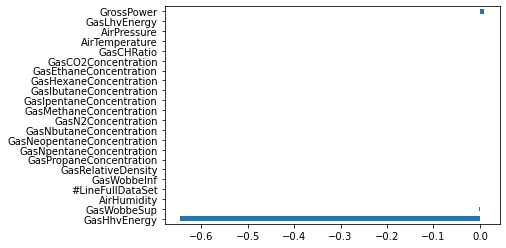

In [169]:
pd.Series(reg1.coef_, index = X.columns).sort_values().plot.barh()

In [170]:
reg1.score(X,y) #R sqared

0.5919310375785937

### Ridge method

In [172]:
reg2 = RidgeCV()
reg2.fit(X,y)
reg2.alpha_  #aplpha is the penalty 


0.1

<AxesSubplot:>

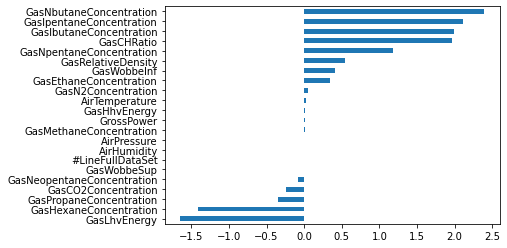

In [173]:
pd.Series(reg2.coef_, index = X.columns).sort_values().plot.barh()

In [174]:
reg2.score(X,y) #R sqared

0.7055645329248246

Ridge Method gives the best R2

### ElasticNet method 

In [175]:
reg3 = ElasticNetCV()
reg3.fit(X,y)
reg3.alpha_  #aplpha is the penalty 


0.4507918301225194

<AxesSubplot:>

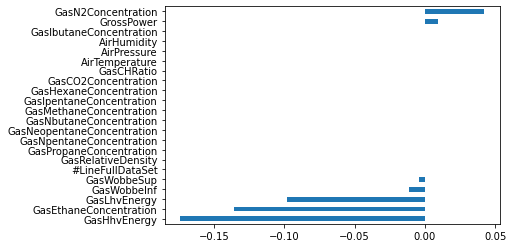

In [176]:
pd.Series(reg3.coef_, index = X.columns).sort_values().plot.barh()

In [177]:
reg3.score(X,y)

0.5210311722370944

# Linear regression model with scikit-learn

In [189]:
df_copy= df.copy()

In [190]:
# to explicitly convert the date column to type DATETIME
df_copy['Timestamp'] = pd.to_datetime(df_copy['Timestamp'])
data = df_copy.set_index('Timestamp')
data.head(4)

,#LineFullDataSet,AirHumidity,AirPressure,AirTemperature,GasCHRatio,GasCO2Concentration,GasEthaneConcentration,GasHexaneConcentration,GasHhvEnergy,GasIbutaneConcentration,GasIpentaneConcentration,GasLhvEnergy,GasMethaneConcentration,GasN2Concentration,GasNbutaneConcentration,GasNeopentaneConcentration,GasNpentaneConcentration,GasPropaneConcentration,GasRelativeDensity,GasWobbeInf,GasWobbeSup,GrossPower,GrossEfficiency
Timestamp,,,,,,,,,,,,,,,,,,,,,,,
2015-03-22 23:00:00,1199,75.381580,1012.281667,24.882820,3.159809,1.231261,4.64522,0.105123,41.276754,0.338723,0.108599,37.415562,86.756768,4.381941,0.434519,0.0,0.094981,1.965464,0.644118,46.468250,51.401799,642.936012,55.870035
2015-03-23 00:00:00,1200,70.840570,1011.627800,25.362420,3.160114,1.230425,4.64057,0.105533,41.275488,0.340175,0.109898,37.454562,86.688370,4.397743,0.436528,0.0,0.095875,1.964265,0.644451,46.454585,51.381693,648.545777,56.527582
2015-03-23 01:00:00,1201,67.683015,1011.111889,25.848530,3.160419,1.242197,4.62787,0.104465,41.274222,0.343888,0.111197,37.296274,86.663580,4.399205,0.439288,0.0,0.096450,1.979045,0.645019,46.445205,51.371858,629.601801,56.923884
2015-03-23 02:00:00,1202,63.917820,1010.511385,25.776187,3.160723,1.247295,4.61864,0.106071,41.272956,0.346094,0.112496,37.287564,86.650192,4.435064,0.444298,0.0,0.098997,1.969762,0.645287,46.430018,51.355793,629.878983,56.877601


In [191]:
#Data normalization
y = data['GrossEfficiency']
X=data.drop(['GrossEfficiency'], axis=1)
X.shape
y.shape

(4517,)

In [192]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

In [193]:
#scaling
scaler_data = MinMaxScaler()
X = scaler_data.fit_transform(X)
y=y.values.reshape(-1,1)
y = scaler_data.fit_transform(y)

In [194]:
from sklearn.model_selection import train_test_split


In [195]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.66,
                                                    random_state=1)

In [196]:
reg = LinearRegression().fit(X, y)
reg.score(X, y)

0.7061662779369258

In [ ]:
#Not so bad but can be improved

In [197]:
reg.coef_

array([[-0.00923176,  0.00326017,  0.00530049,  0.0263743 ,  0.11871948,
        -0.01723466,  0.07691215, -0.05144165, -0.01882832,  0.00895296,
         0.09016452, -0.44758325,  0.04038367,  0.01586405,  0.02392787,
        -0.00197461, -0.03398103, -0.1385622 ,  0.00063127,  0.10328374,
        -0.00412971,  0.16635249]])

In [199]:
reg.intercept_

array([0.59543023])

In [200]:
#Testing the prediction
reg.predict(X_test)

array([[0.73270701],
       [0.76497173],
       [0.74530974],
       ...,
       [0.67202124],
       [0.76937386],
       [0.75315209]])

# Different alogorithm for regression over GrossEfficiency

In [201]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import TimeSeriesSplit

In [202]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):
    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

### Apply a classical ML algorithm

LR: 0.733642 (0.099637)
XGB: 0.749762 (0.102214)
KNN: 0.705084 (0.102643)
RF: 0.729894 (0.098392)
SVR: 0.259511 (0.400546)
DTR: 0.579342 (0.108204)
NN: 0.736589 (0.100256)


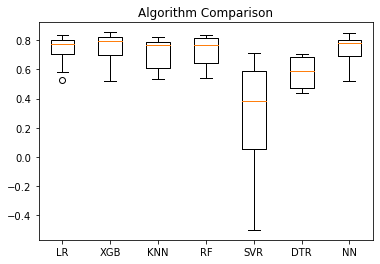

In [203]:
# Spot Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('XGB', GradientBoostingRegressor()))
models.append(('KNN', KNeighborsRegressor())) 
models.append(('RF', RandomForestRegressor(n_estimators = 10))) # Ensemble method - collection of many decision trees
models.append(('SVR', SVR(gamma='auto'))) # kernel = linear
models.append(('DTR',DecisionTreeRegressor(random_state = 30)))
models.append(('NN', MLPRegressor(solver = 'lbfgs')))  #neural network
# Evaluate each model in turn
results = []
names = []
for name, model in models:
    # TimeSeries Cross validation
 tscv = TimeSeriesSplit(n_splits=10)
    
 cv_results = cross_val_score(model, X_train, y_train.ravel(), cv=tscv, scoring='r2')
 results.append(cv_results)
 names.append(name)
 print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

LR seems to make best results but still can be improved

# Grid Searching Hyperparameters

In [210]:
from sklearn.metrics import make_scorer
def rmse(actual, predict):
    predict = np.array(predict)
    actual = np.array(actual)
    distance = predict - actual
    square_distance = distance ** 2
    mean_square_distance = square_distance.mean()
    score = np.sqrt(mean_square_distance)
    return score

rmse_score = make_scorer(rmse, greater_is_better = False)

In [211]:
from sklearn.model_selection import GridSearchCV
model = RandomForestRegressor()
param_search = { 
    'n_estimators': [20, 50, 100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [i for i in range(5,15)]
}
tscv = TimeSeriesSplit(n_splits=10)
gsearch = GridSearchCV(estimator=model, cv=tscv, param_grid=param_search, scoring = rmse_score)

gsearch.fit(X_train, y_train_scaled.ravel())
best_score = gsearch.best_score_
best_model = gsearch.best_estimator_

In [214]:
y_true = y_test
y_pred = best_model.predict(X_test)
regression_results(y_true, y_pred)

explained_variance:  0.6121
mean_squared_log_error:  0.0019
r2:  -0.8002
MAE:  0.0713
MSE:  0.0058
RMSE:  0.0764


# General LR (panel data more accurate)

In [89]:
df3= df.copy()

In [90]:
df3.head()

,#LineFullDataSet,Timestamp,AirHumidity,AirPressure,AirTemperature,GasCHRatio,GasCO2Concentration,GasEthaneConcentration,GasHexaneConcentration,GasHhvEnergy,GasIbutaneConcentration,GasIpentaneConcentration,GasLhvEnergy,GasMethaneConcentration,GasN2Concentration,GasNbutaneConcentration,GasNeopentaneConcentration,GasNpentaneConcentration,GasPropaneConcentration,GasRelativeDensity,GasWobbeInf,GasWobbeSup,GrossPower,GrossEfficiency
0,1199,2015-03-22 23:00:00,75.381580,1012.281667,24.882820,3.159809,1.231261,4.645220,0.105123,41.276754,0.338723,0.108599,37.415562,86.756768,4.381941,0.434519,0.0,0.094981,1.965464,0.644118,46.468250,51.401799,642.936012,55.870035
1,1200,2015-03-23 00:00:00,70.840570,1011.627800,25.362420,3.160114,1.230425,4.640570,0.105533,41.275488,0.340175,0.109898,37.454562,86.688370,4.397743,0.436528,0.0,0.095875,1.964265,0.644451,46.454585,51.381693,648.545777,56.527582
2,1201,2015-03-23 01:00:00,67.683015,1011.111889,25.848530,3.160419,1.242197,4.627870,0.104465,41.274222,0.343888,0.111197,37.296274,86.663580,4.399205,0.439288,0.0,0.096450,1.979045,0.645019,46.445205,51.371858,629.601801,56.923884
3,1202,2015-03-23 02:00:00,63.917820,1010.511385,25.776187,3.160723,1.247295,4.618640,0.106071,41.272956,0.346094,0.112496,37.287564,86.650192,4.435064,0.444298,0.0,0.098997,1.969762,0.645287,46.430018,51.355793,629.878983,56.877601
4,1203,2015-03-23 03:00:00,55.975115,1010.119500,25.868055,3.161028,1.238268,4.604286,0.110483,41.201310,0.347224,0.113795,37.278854,86.648904,4.499998,0.448395,0.0,0.100627,1.953770,0.645133,46.419204,51.335278,646.498867,57.086776


In [91]:
from linearmodels.datasets import wage_panel
import pandas as pd
from linearmodels.panel import PooledOLS
import statsmodels.api as sm

In [92]:
# Perform PooledOLS
from linearmodels import PooledOLS
import statsmodels.api as sm
#swap indexes
#df3.index = df3.index.swaplevel(0,1)
df.Timestamp = pd.to_datetime(df.Timestamp)
df3 = df3.set_index(['#LineFullDataSet','Timestamp'])
endog = df3.GrossEfficiency
exog = sm.tools.tools.add_constant(df3.drop('GrossEfficiency', axis=1))
mod = PooledOLS(endog, exog)
pooledOLS_res = mod.fit(cov_type='clustered', cluster_entity=True)
# Store values for checking homoskedasticity graphically
fittedvals_pooled_OLS = pooledOLS_res.predict().fitted_values
residuals_pooled_OLS = pooledOLS_res.resids

In [93]:
print(pooledOLS_res)

                          PooledOLS Estimation Summary                          
Dep. Variable:        GrossEfficiency   R-squared:                        0.7050
Estimator:                  PooledOLS   R-squared (Between):              0.7050
No. Observations:                4517   R-squared (Within):               0.0000
Date:                Mon, Jan 10 2022   R-squared (Overall):              0.7050
Time:                        10:06:41   Log-likelihood                   -4203.5
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      511.48
Entities:                        4517   P-value                           0.0000
Avg Obs:                       1.0000   Distribution:                 F(21,4495)
Min Obs:                       1.0000                                           
Max Obs:                       1.0000   F-statistic (robust):             532.09
                            

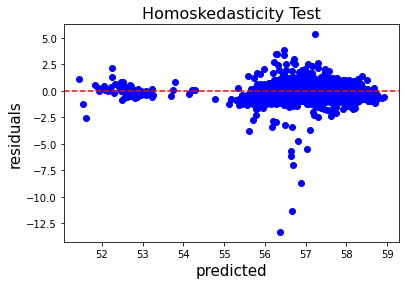

In [94]:
# 3A. Homoskedasticity
import matplotlib.pyplot as plt
 # 3A.1 Residuals-Plot for growing Variance Detection
fig, ax = plt.subplots()
ax.scatter(fittedvals_pooled_OLS, residuals_pooled_OLS, color = 'blue')
ax.axhline(0, color = 'r', ls = '--')
ax.set_xlabel('predicted', fontsize = 15)
ax.set_ylabel('residuals', fontsize = 15)
ax.set_title('Homoskedasticity Test', fontsize = 16)
plt.show()

If the plotted data points spread out, this is an indicator for growing variance so, for heteroskedasticity.

In [95]:
# 3B. Non-Autocorrelation
# Durbin-Watson-Test
from statsmodels.stats.stattools import durbin_watson

durbin_watson_test_results = durbin_watson(residuals_pooled_OLS) 
print(durbin_watson_test_results)

1.042400625884671


The Durbin-Watson-Test will have one output between 0 – 4. The mean (= 2) would indicate that there is no autocorrelation identified, 0 – 2 means positive autocorrelation (the nearer to zero the higher the correlation), and 2 – 4 means negative autocorrelation (the nearer to four the higher the correlation). In our example, the result is 1.042400625884671, which clearly indicates strong positive autocorrelation.

# FE-/RE-model will be more suitable

In [198]:
df4= df.copy()

In [199]:
from linearmodels import PanelOLS
from linearmodels import RandomEffects

df4.Timestamp = pd.to_datetime(df4.Timestamp)
df4 = df4.set_index(['#LineFullDataSet','Timestamp'])
endog = df4.GrossEfficiency
exog = sm.tools.tools.add_constant(df4.drop('GrossEfficiency', axis=1))

# random effects model
# model_re = RandomEffects(endog, exog) 
# re_res = model_re.fit() 
# fixed effects model
model_fe = PanelOLS(endog, exog, entity_effects = True, drop_absorbed=True) 
fe_res = model_fe.fit() 
#print results
#print(re_res)
print(fe_res)

                          PanelOLS Estimation Summary                           
Dep. Variable:        GrossEfficiency   R-squared:                        0.0000
Estimator:                   PanelOLS   R-squared (Between):             -267.90
No. Observations:                4517   R-squared (Within):               0.0000
Date:                Fri, Jan 07 2022   R-squared (Overall):             -267.90
Time:                        11:44:22   Log-likelihood                 1.268e+05
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      0.8988
Entities:                        4517   P-value                                 
Avg Obs:                       1.0000   Distribution:                    F(1,-1)
Min Obs:                       1.0000                                           
Max Obs:                       1.0000   F-statistic (robust):          1.258e+14
                            

# Time serie with scikit-learn

In [178]:
df_copy= df.copy()

In [179]:
# to explicitly convert the date column to type DATETIME
df_copy['Timestamp'] = pd.to_datetime(df_copy['Timestamp'])
data = df_copy.set_index('Timestamp')
data.head()

,#LineFullDataSet,AirHumidity,AirPressure,AirTemperature,GasCHRatio,GasCO2Concentration,GasEthaneConcentration,GasHexaneConcentration,GasHhvEnergy,GasIbutaneConcentration,GasIpentaneConcentration,GasLhvEnergy,GasMethaneConcentration,GasN2Concentration,GasNbutaneConcentration,GasNeopentaneConcentration,GasNpentaneConcentration,GasPropaneConcentration,GasRelativeDensity,GasWobbeInf,GasWobbeSup,GrossPower,GrossEfficiency
Timestamp,,,,,,,,,,,,,,,,,,,,,,,
2015-03-22 23:00:00,1199,75.381580,1012.281667,24.882820,3.159809,1.231261,4.645220,0.105123,41.276754,0.338723,0.108599,37.415562,86.756768,4.381941,0.434519,0.0,0.094981,1.965464,0.644118,46.468250,51.401799,642.936012,55.870035
2015-03-23 00:00:00,1200,70.840570,1011.627800,25.362420,3.160114,1.230425,4.640570,0.105533,41.275488,0.340175,0.109898,37.454562,86.688370,4.397743,0.436528,0.0,0.095875,1.964265,0.644451,46.454585,51.381693,648.545777,56.527582
2015-03-23 01:00:00,1201,67.683015,1011.111889,25.848530,3.160419,1.242197,4.627870,0.104465,41.274222,0.343888,0.111197,37.296274,86.663580,4.399205,0.439288,0.0,0.096450,1.979045,0.645019,46.445205,51.371858,629.601801,56.923884
2015-03-23 02:00:00,1202,63.917820,1010.511385,25.776187,3.160723,1.247295,4.618640,0.106071,41.272956,0.346094,0.112496,37.287564,86.650192,4.435064,0.444298,0.0,0.098997,1.969762,0.645287,46.430018,51.355793,629.878983,56.877601
2015-03-23 03:00:00,1203,55.975115,1010.119500,25.868055,3.161028,1.238268,4.604286,0.110483,41.201310,0.347224,0.113795,37.278854,86.648904,4.499998,0.448395,0.0,0.100627,1.953770,0.645133,46.419204,51.335278,646.498867,57.086776


In [180]:
#Data normalization
X=data.drop(['#LineFullDataSet','GrossEfficiency'], axis=1)
y = data['GrossEfficiency']
X.shape
y.shape

(4517,)

In [181]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y=y.values.reshape(-1,1)
y_scaled = scaler.fit_transform(y)

In [182]:
y_scaled.shape

(4517, 1)

In [183]:
from sklearn.model_selection import train_test_split
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.66,
                                                    random_state=1)

In [186]:
scaler_data = MinMaxScaler()
X_train_scaled= scaler.fit_transform(X_train)
y=y_train.reshape(-1,1)
y_train_scaled = scaler.fit_transform(y)

In [1]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_val_score
# # Evaluate each model in turn
# models = []
# results = []
# names = []
# for name, model in models:
# # TimeSeries Cross validation
#  tscv = TimeSeriesSplit(n_splits=10)
#  cv_results = cross_val_score(model, X_train, y_train.ravel(), cv=tscv, scoring='r2')
#  results.append(cv_results)
#  names.append(name)
#  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    
# # Compare Algorithms
# plt.boxplot(results, labels=names)
# plt.title('Algorithm Comparison')
# plt.show()

# ANN model 

In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [75]:
model = Sequential()


model.add(Dense(19, activation='relu')) #input
model.add(Dense(19, activation='relu')) #hidden
model.add(Dense(19, activation='relu')) #hidden
model.add(Dense(19, activation='relu')) #output

model.add(Dense(1))  #car prediction d une valeru

model.compile(optimizer='adam', loss='mse', metrics = ['accuracy'])

In [76]:
history = model.fit(x= X_train, y=y_train, validation_data=(X_test, y_test), batch_size=128, epochs=400)

Epoch 1/400
12/12 [==============================] - 1s 17ms/step - loss: 3293.9150 - accuracy: 0.0000e+00 - val_loss: 3289.3125 - val_accuracy: 0.0000e+00
Epoch 2/400
12/12 [==============================] - 0s 6ms/step - loss: 3273.2244 - accuracy: 0.0000e+00 - val_loss: 3263.4309 - val_accuracy: 0.0000e+00
Epoch 3/400
12/12 [==============================] - 0s 6ms/step - loss: 3239.4202 - accuracy: 0.0000e+00 - val_loss: 3217.5339 - val_accuracy: 0.0000e+00
Epoch 4/400
12/12 [==============================] - 0s 5ms/step - loss: 3176.1843 - accuracy: 0.0000e+00 - val_loss: 3126.9099 - val_accuracy: 0.0000e+00
Epoch 5/400
12/12 [==============================] - 0s 7ms/step - loss: 3051.3062 - accuracy: 0.0000e+00 - val_loss: 2954.3044 - val_accuracy: 0.0000e+00
Epoch 6/400
12/12 [==============================] - 0s 7ms/step - loss: 2823.5776 - accuracy: 0.0000e+00 - val_loss: 2648.5496 - val_accuracy: 0.0000e+00
Epoch 7/400
12/12 [==============================] - 0s 6ms/step - lo

Epoch 55/400
12/12 [==============================] - 0s 5ms/step - loss: 8.1342 - accuracy: 0.0000e+00 - val_loss: 8.1854 - val_accuracy: 0.0000e+00
Epoch 56/400
12/12 [==============================] - 0s 5ms/step - loss: 7.9949 - accuracy: 0.0000e+00 - val_loss: 8.0240 - val_accuracy: 0.0000e+00
Epoch 57/400
12/12 [==============================] - 0s 5ms/step - loss: 7.8736 - accuracy: 0.0000e+00 - val_loss: 7.9284 - val_accuracy: 0.0000e+00
Epoch 58/400
12/12 [==============================] - 0s 5ms/step - loss: 7.7647 - accuracy: 0.0000e+00 - val_loss: 7.7893 - val_accuracy: 0.0000e+00
Epoch 59/400
12/12 [==============================] - 0s 5ms/step - loss: 7.6397 - accuracy: 0.0000e+00 - val_loss: 7.6936 - val_accuracy: 0.0000e+00
Epoch 60/400
12/12 [==============================] - 0s 5ms/step - loss: 7.5269 - accuracy: 0.0000e+00 - val_loss: 7.5552 - val_accuracy: 0.0000e+00
Epoch 61/400
12/12 [==============================] - 0s 6ms/step - loss: 7.4230 - accuracy: 0.0000e

12/12 [==============================] - 0s 7ms/step - loss: 2.5527 - accuracy: 0.0000e+00 - val_loss: 2.4201 - val_accuracy: 0.0000e+00
Epoch 164/400
12/12 [==============================] - 0s 7ms/step - loss: 2.5325 - accuracy: 0.0000e+00 - val_loss: 2.4148 - val_accuracy: 0.0000e+00
Epoch 165/400
12/12 [==============================] - 0s 7ms/step - loss: 2.5243 - accuracy: 0.0000e+00 - val_loss: 2.3978 - val_accuracy: 0.0000e+00
Epoch 166/400
12/12 [==============================] - 0s 6ms/step - loss: 2.5236 - accuracy: 0.0000e+00 - val_loss: 2.3921 - val_accuracy: 0.0000e+00
Epoch 167/400
12/12 [==============================] - 0s 6ms/step - loss: 2.5245 - accuracy: 0.0000e+00 - val_loss: 2.3782 - val_accuracy: 0.0000e+00
Epoch 168/400
12/12 [==============================] - 0s 6ms/step - loss: 2.5052 - accuracy: 0.0000e+00 - val_loss: 2.3807 - val_accuracy: 0.0000e+00
Epoch 169/400
12/12 [==============================] - 0s 7ms/step - loss: 2.4765 - accuracy: 0.0000e+00 - v

12/12 [==============================] - 0s 8ms/step - loss: 1.8592 - accuracy: 0.0000e+00 - val_loss: 1.7797 - val_accuracy: 0.0000e+00
Epoch 272/400
12/12 [==============================] - 0s 7ms/step - loss: 1.8431 - accuracy: 0.0000e+00 - val_loss: 1.7590 - val_accuracy: 0.0000e+00
Epoch 273/400
12/12 [==============================] - 0s 7ms/step - loss: 1.8348 - accuracy: 0.0000e+00 - val_loss: 1.7579 - val_accuracy: 0.0000e+00
Epoch 274/400
12/12 [==============================] - 0s 7ms/step - loss: 1.8279 - accuracy: 0.0000e+00 - val_loss: 1.7657 - val_accuracy: 0.0000e+00
Epoch 275/400
12/12 [==============================] - 0s 8ms/step - loss: 1.8223 - accuracy: 0.0000e+00 - val_loss: 1.7464 - val_accuracy: 0.0000e+00
Epoch 276/400
12/12 [==============================] - 0s 10ms/step - loss: 1.8452 - accuracy: 0.0000e+00 - val_loss: 1.7464 - val_accuracy: 0.0000e+00
Epoch 277/400
12/12 [==============================] - 0s 8ms/step - loss: 1.8354 - accuracy: 0.0000e+00 - 

12/12 [==============================] - 0s 8ms/step - loss: 1.3771 - accuracy: 0.0000e+00 - val_loss: 1.3945 - val_accuracy: 0.0000e+00
Epoch 380/400
12/12 [==============================] - 0s 8ms/step - loss: 1.4229 - accuracy: 0.0000e+00 - val_loss: 1.3811 - val_accuracy: 0.0000e+00
Epoch 381/400
12/12 [==============================] - 0s 8ms/step - loss: 1.4161 - accuracy: 0.0000e+00 - val_loss: 1.3900 - val_accuracy: 0.0000e+00
Epoch 382/400
12/12 [==============================] - 0s 7ms/step - loss: 1.3882 - accuracy: 0.0000e+00 - val_loss: 1.3406 - val_accuracy: 0.0000e+00
Epoch 383/400
12/12 [==============================] - 0s 7ms/step - loss: 1.3592 - accuracy: 0.0000e+00 - val_loss: 1.3232 - val_accuracy: 0.0000e+00
Epoch 384/400
12/12 [==============================] - 0s 8ms/step - loss: 1.3474 - accuracy: 0.0000e+00 - val_loss: 1.3227 - val_accuracy: 0.0000e+00
Epoch 385/400
12/12 [==============================] - 0s 7ms/step - loss: 1.3476 - accuracy: 0.0000e+00 - v

In [77]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 19)                437       
                                                                 
 dense_6 (Dense)             (None, 19)                380       
                                                                 
 dense_7 (Dense)             (None, 19)                380       
                                                                 
 dense_8 (Dense)             (None, 19)                380       
                                                                 
 dense_9 (Dense)             (None, 1)                 20        
                                                                 
Total params: 1,597
Trainable params: 1,597
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:>

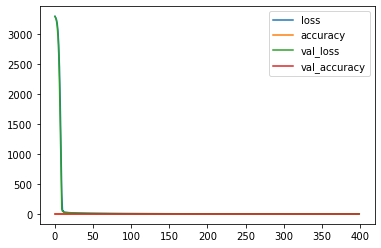

In [78]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [79]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

In [80]:
predictions = model.predict(X_test)
mean_squared_error(y_test, predictions)

1.3584812218378914

In [81]:
metrics.r2_score(y_test, predictions)

-0.09939236718659195

Very Good mse value. however this rough model need optimization (epochs, drop,learning rate) 

In [82]:
mean_absolute_error(y_test, predictions)

0.6481611646710995

In [83]:
df['GrossEfficiency'].describe()

count    4517.000000
mean       57.499579
std         1.129891
min        43.065936
25%        57.252169
50%        57.776711
75%        58.138480
max        62.582768
Name: GrossEfficiency, dtype: float64

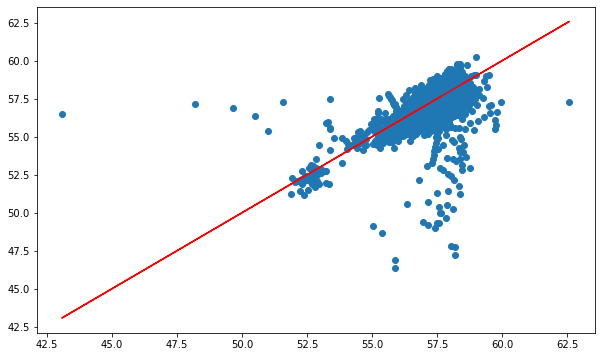

In [84]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test,'r')

Good fitting of the the predicted value, except some outlier far from the line
